In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook

import seaborn as sns

sns.set()

In [2]:
doc = pd.read_csv('Document Similarity/train.csv')

In [3]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


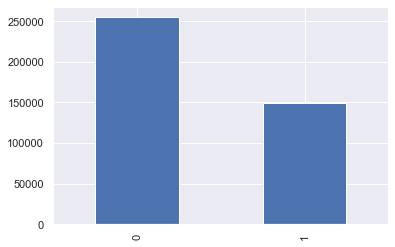

In [4]:
doc['is_duplicate'].value_counts().plot.bar()

In [5]:
doc['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [6]:
doc.shape

(404290, 6)

In [7]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
# question1 & question2 has some missing values...

In [9]:
doc.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [10]:
# this problem is binary classification and We have to use metrics as log loss...

In [11]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
# in percentage we can see
# 36 % questions are simillar.
# 63 % questions are not simillar.
round(doc['is_duplicate'].mean()*100 , 2)

36.92

In [13]:
# unique no. Question
unique_no_ques = pd.Series(doc['qid1'].tolist() + doc['qid2'].tolist())
unique_idq = len(unique_no_ques.unique())
unique_idq

537933

In [14]:
# so there are 537933 total unique no. of questions
# now we see max time question occur
# we can see 157 a question occur the most times
max(unique_no_ques.value_counts())

157

In [15]:
# morethen on time question or Repeted question

more_then_onetime = np.sum(unique_no_ques.value_counts() > 1)
more_then_onetime

111780

In [16]:
more_then_onetime / unique_idq * 100 # 20 % question occur more then one time

20.77953945937505

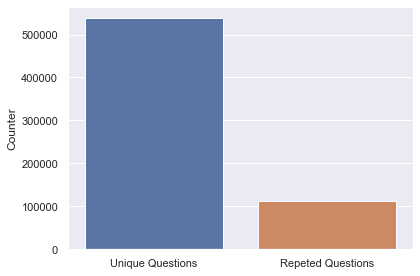

In [17]:
x = ['Unique Questions' , 'Repeted Questions']
y = [unique_idq , more_then_onetime]

sns.barplot(x,y)
plt.ylabel('Counter')
plt.tight_layout()

In [18]:
#checking wheather there are any repeated pair of columns
pair_duplicates = doc[['id','qid1','qid2']].groupby(['qid1','qid2']).count()
pair_duplicates.shape[0] - doc.shape[0]

# so not duplicated rows

0

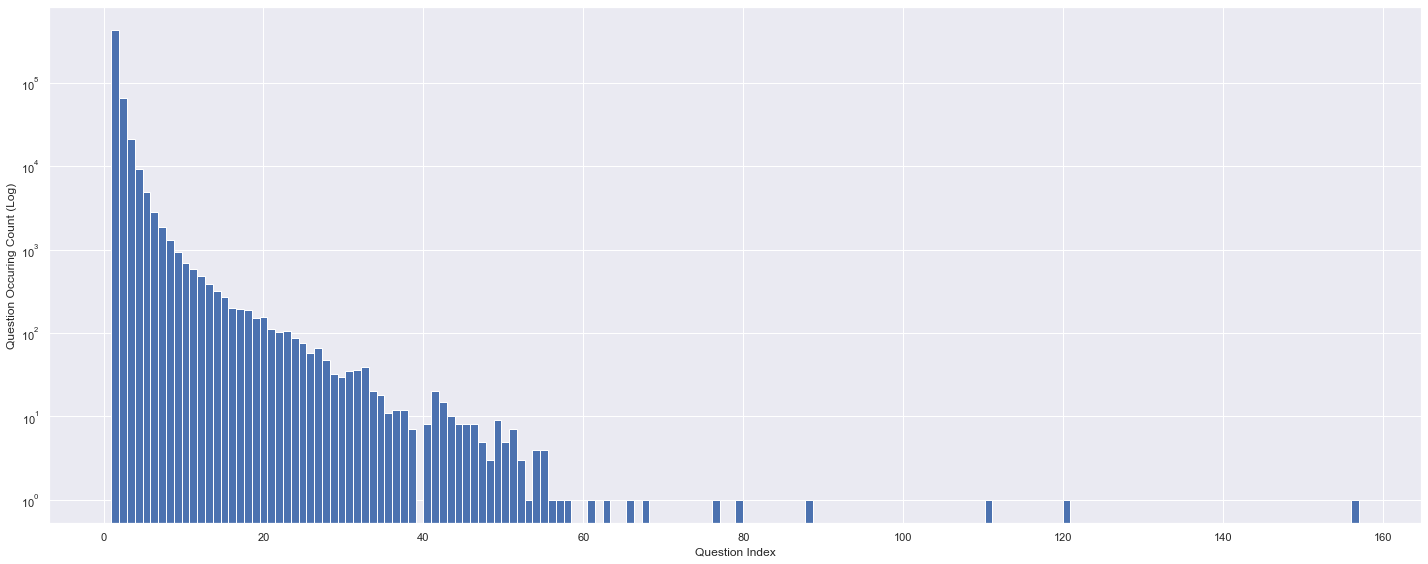

In [19]:
# questions counts graph
plt.figure(figsize=(20,8))
plt.hist(unique_no_ques.value_counts() , bins=160)
plt.yscale('log')
plt.xlabel('Question Index')
plt.ylabel('Question Occuring Count (Log)')
plt.tight_layout()
plt.show()

In [20]:
#null rows
doc.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [21]:
doc[(doc['question1'].isnull())] # question 1 NaN columns

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [22]:
doc[(doc['question2'].isnull())] # question 2 NaN columns

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [23]:
# we remove both columns
# we reomve the columns because we have very huge dataset compare to missing values...

doc.dropna(inplace=True)
doc.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

### Feature Engineering

In [24]:
# we add some extra frequency's columns , word common column, word share column , len words column

In [25]:
doc['freq_qid1'] = doc.groupby('qid1')['qid1'].transform('count')

In [26]:
doc['freq_qid2'] = doc.groupby('qid2')['qid2'].transform('count')
doc['q1len'] = doc['question1'].str.len()
doc['q2len'] = doc['question2'].str.len()
doc['q1_n_words'] = doc['question1'].apply(lambda x : len(x.split(" ")))
doc['q2_n_words'] = doc['question2'].apply(lambda x : len(x.split(" ")))

In [27]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


In [28]:
def normalized_words(row):
    w1 = set(map(lambda word : word.lower().strip(),row['question1'].split(' ') ))
    w2 = set(map(lambda word : word.lower().strip(),row['question2'].split(' ') ))
    return 1.0 * len(w1 & w2)

doc['word_common'] = doc.apply(normalized_words , axis = 1)

def word_total(row):
    w1 = set(map(lambda word : word.lower().strip(),row['question1'].split(' ') ))
    w2 = set(map(lambda word : word.lower().strip(),row['question2'].split(' ') ))
    return 1.0 *(len(w1) + len(w2))

doc['word_total'] = doc.apply(word_total , axis = 1)

In [29]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0


In [30]:
doc['word_share'] = doc['word_common'] / doc['word_total']

In [31]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000


In [32]:
doc['freq_q1+q2'] = doc['freq_qid1'] + doc['freq_qid2']
doc['freq_q1-q2'] = abs(doc['freq_qid1'] - doc['freq_qid2'])

In [33]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [34]:
def plot_feature(x):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.violinplot(x= 'is_duplicate' , y = x , data=doc)
    plt.subplot(1,2,2)
    sns.distplot(doc[doc['is_duplicate'] == 1][x] , label='1' ,color='red')
    sns.distplot(doc[doc['is_duplicate'] == 0][x] , label='0' ,color='blue')
    plt.show()

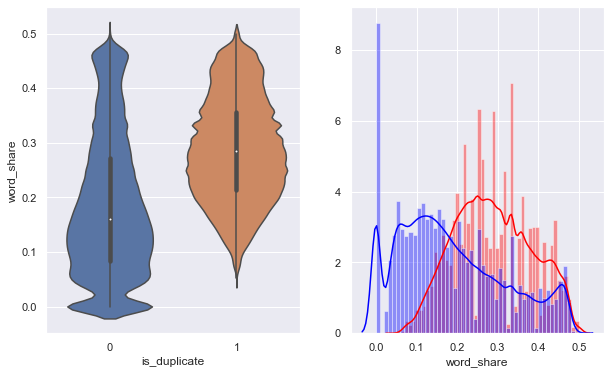

In [35]:
plot_feature('word_share')

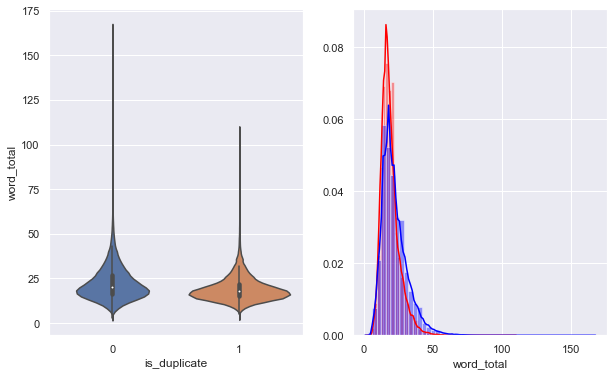

In [36]:
plot_feature('word_total') # as you can see it is a worst graph both graphs are overlapped..

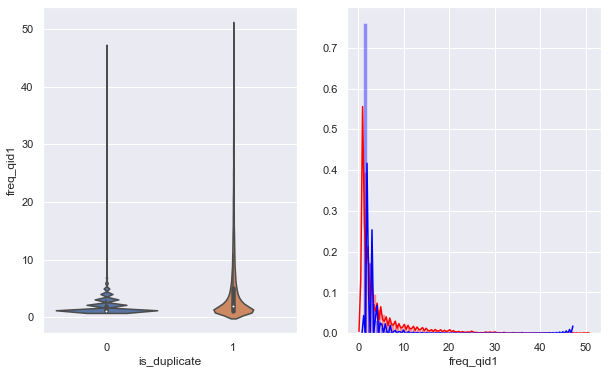

In [37]:
plot_feature('freq_qid1') # worst as above

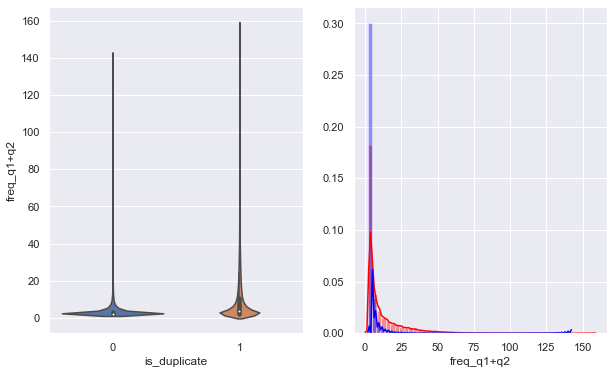

In [38]:
plot_feature('freq_q1+q2') # worst

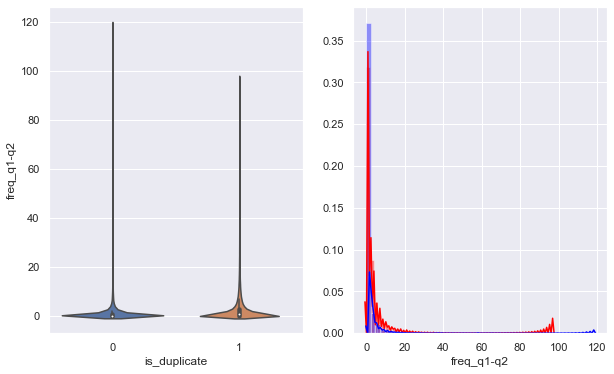

In [39]:
plot_feature('freq_q1-q2') # not good

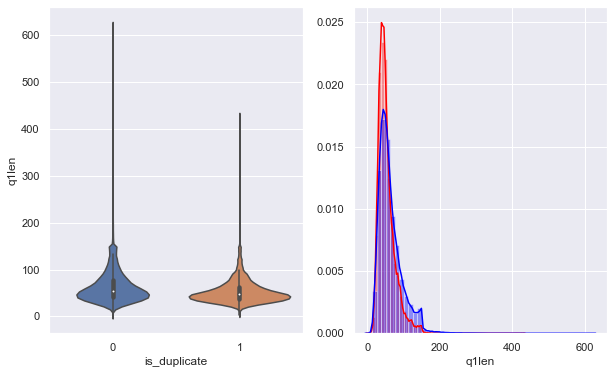

In [40]:
plot_feature('q1len') # not insightful

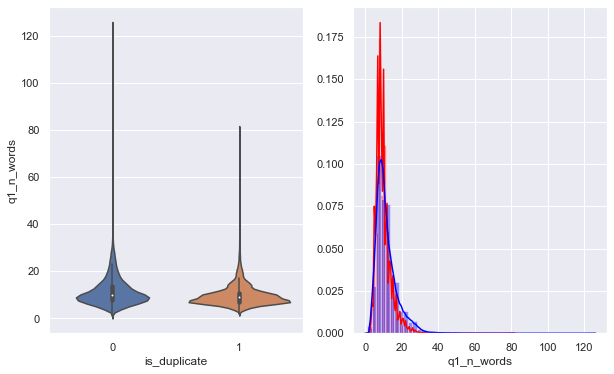

In [41]:
plot_feature('q1_n_words')

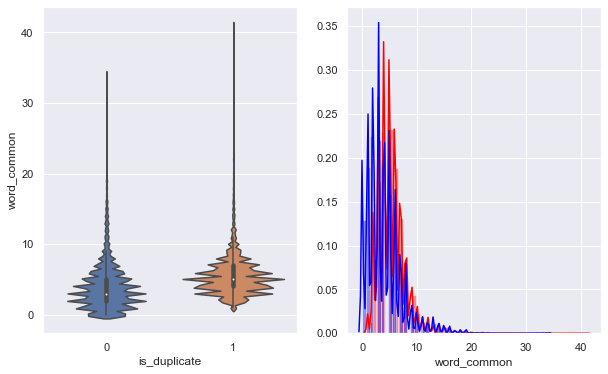

In [42]:
plot_feature('word_common') #completely useless..

### Preprocessing on text

In [43]:
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [44]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        # BeautifulSoup is the function used for Removing HTMl & XML Code.. 
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [53]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
   

    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [47]:
from fuzzywuzzy import fuzz

C:\Users\Admin\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [51]:
import distance

In [54]:
doc = extract_features(doc)

token features...


In [55]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76,39,...,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [56]:
df_duplicate = doc[doc['is_duplicate'] == 1]
dfp_duplicate = doc[doc['is_duplicate'] == 0]

In [57]:
doc['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [58]:
# pair of questions
p = np.dstack([df_duplicate['question1'] , df_duplicate['question2']]).flatten()
q = np.dstack([dfp_duplicate['question1'] , dfp_duplicate['question2']]).flatten()


In [59]:
print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(q))

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510048


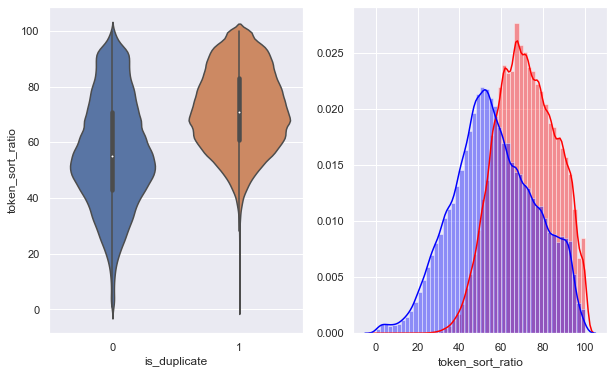

In [60]:
plot_feature('token_sort_ratio')

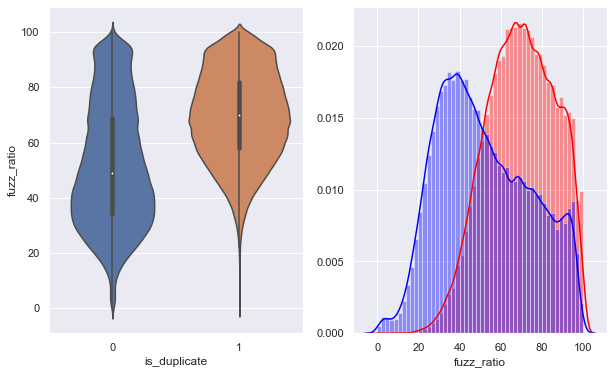

In [61]:
plot_feature('fuzz_ratio')

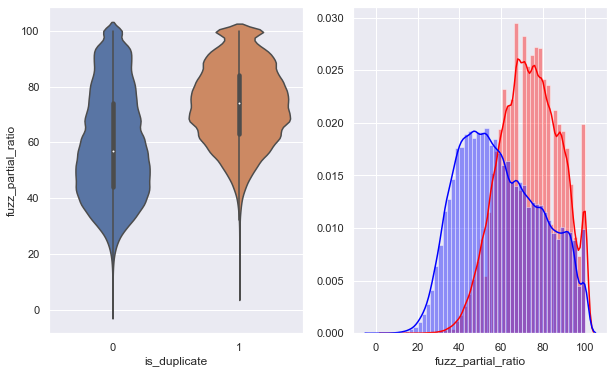

In [62]:
plot_feature('fuzz_partial_ratio')

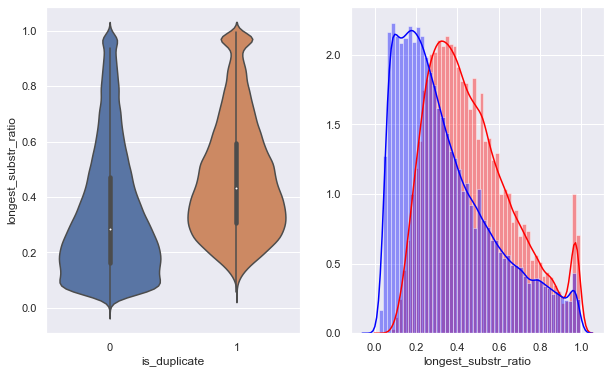

In [63]:
plot_feature('longest_substr_ratio')

In [64]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = doc[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [65]:
from sklearn.manifold import TSNE

In [66]:
tsne2d = TSNE(n_components=2 ,init ='random' ,random_state =101 ,method = 'barnes_hut' , n_iter = 1000 ,verbose =2 ,angle =0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 0.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.131928
[t-SNE] Computed conditional probabilities in 0.352s
[t-SNE] Iteration 50: error = 81.3534622, gradient norm = 0.0532696 (50 iterations in 1.477s)
[t-SNE] Iteration 100: error = 70.6857834, gradient norm = 0.0106284 (50 iterations in 1.424s)
[t-SNE] Iteration 150: error = 69.0271606, gradient norm = 0.0053264 (50 iterations in 2.749s)
[t-SNE] Iteration 200: error = 68.2512131, gradient norm = 0.0047586 (50 iterations in 2.796s)
[t-SNE] Iteration 250: error = 67.7725372, gradient norm = 0.0034672

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


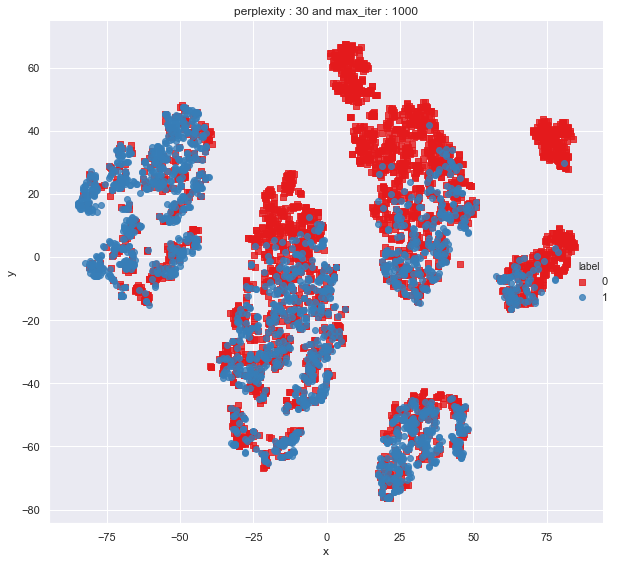

In [67]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.tight_layout()
plt.show()

In [68]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.028s...
[t-SNE] Computed neighbors for 5000 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.131928
[t-SNE] Computed conditional probabilities in 0.202s
[t-SNE] Iteration 50: error = 80.5688934, gradient norm = 0.0322042 (50 iterations in 7.329s)
[t-SNE] Iteration 100: error = 69.4820480, gradient norm = 0.0033567 (50 iterations in 5.123s)
[t-SNE] Iteration 150: error = 68.1103058, gradient norm = 0.0017152 (50 iterations in 3.523s)
[t-SNE] Iteration 200: error = 67.5371323, gradient norm = 0.0012641 (50 iterations in 5.386s)
[t-SNE] Iteration 250: error = 67.2233887, gradient norm = 0.0009038

### Plotly

In [69]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

In [70]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [71]:
from wordcloud import WordCloud
def Visualiza_Data(label , que):
    words = ''
    for msg in doc[doc['is_duplicate'] == label][que]:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600 , height = 600).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

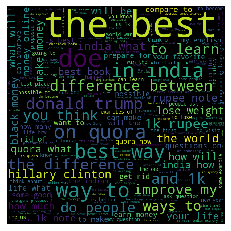

Text(0.5, 1.0, 'Common question for Question 1 ')

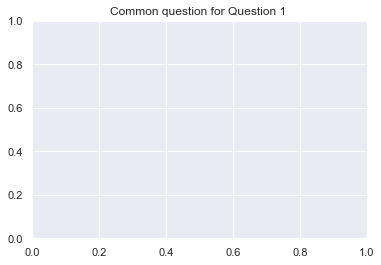

In [72]:
Visualiza_Data(1 , 'question1')
plt.title('Common question for Question 1 ')

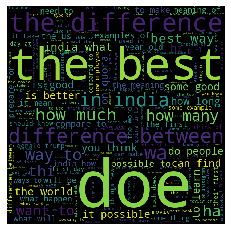

Text(0.5, 1.0, 'Not Common question for Question 1 ')

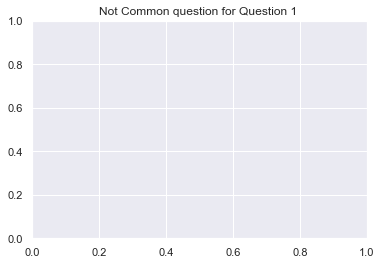

In [73]:
Visualiza_Data(0, 'question1')
plt.title('Not Common question for Question 1 ')

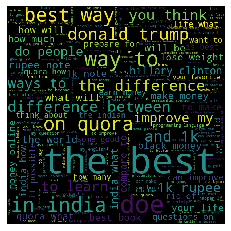

Text(0.5, 1.0, 'Common question for Question 2 ')

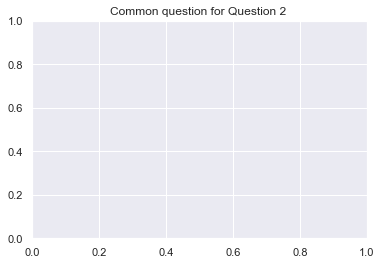

In [74]:
Visualiza_Data(1 , 'question2')
plt.title('Common question for Question 2 ')

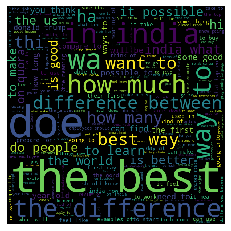

Text(0.5, 1.0, 'Not Common question for Question 2 ')

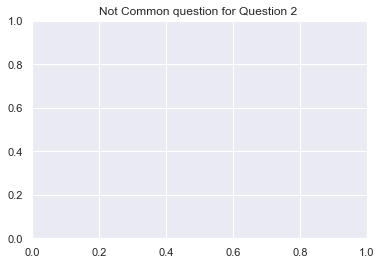

In [75]:
Visualiza_Data(0 , 'question2')
plt.title('Not Common question for Question 2 ')

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [77]:
doc.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76,39,...,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [78]:
doc['question1'] = doc['question1'].apply(lambda x : str(x))
doc['question2'] = doc['question2'].apply(lambda x : str(x))

In [79]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    404287 non-null  int64  
 1   qid1                  404287 non-null  int64  
 2   qid2                  404287 non-null  int64  
 3   question1             404287 non-null  object 
 4   question2             404287 non-null  object 
 5   is_duplicate          404287 non-null  int64  
 6   freq_qid1             404287 non-null  int64  
 7   freq_qid2             404287 non-null  int64  
 8   q1len                 404287 non-null  int64  
 9   q2len                 404287 non-null  int64  
 10  q1_n_words            404287 non-null  int64  
 11  q2_n_words            404287 non-null  int64  
 12  word_common           404287 non-null  float64
 13  word_total            404287 non-null  float64
 14  word_share            404287 non-null  float64
 15  

In [80]:
questions = list(doc['question1']) + list(doc['question2'])

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
new_tfidf = TfidfVectorizer(max_features=384)
new_tfidf.fit_transform(questions)

<808574x384 sparse matrix of type '<class 'numpy.float64'>'
	with 5428055 stored elements in Compressed Sparse Row format>

In [84]:
question1 = new_tfidf.transform(doc['question1']).toarray()
question2 = new_tfidf.transform(doc['question2']).toarray()

In [85]:
question1 = pd.DataFrame(question1)

In [86]:
question2 = pd.DataFrame(question2)

In [87]:
question1['id'] = doc['id']
question2['id'] = doc['id']

In [88]:
# 
question1.dropna(inplace = True)

In [89]:
question1['id'] = question1['id'].apply(lambda X : int(X))

In [90]:
question2.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
380    0
381    0
382    0
383    0
id     3
Length: 385, dtype: int64

In [91]:
question2.dropna(inplace = True)

In [92]:
question2['id'] = question2['id'].apply(lambda X : int(X))

In [93]:
doc = pd.merge( doc , question1 , on='id' , how = 'left' , right_index = True)
doc = pd.merge(doc , question2 , on ='id' , how = 'left' , right_index= True)

In [94]:
doc.shape

(404287, 800)

In [96]:
from keras.models import Sequential
from keras.layers import Dense , Dropout 

In [97]:
from sklearn.model_selection import train_test_split

In [100]:
x = doc.drop(columns=['is_duplicate'] ,axis = 1)

In [101]:
y = doc['is_duplicate']

In [103]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state =42)

In [104]:
X_train.shape , X_test.shape

((303215, 799), (101072, 799))

In [107]:
model = Sequential([
    Dense(units = 512 , input_dim = X_train.shape[1] , activation='relu'),
    Dropout(0.3),
    Dense(units = 256 , activation='relu'),
    Dropout(0.3),
    Dense(units = 128 , activation = 'relu'),
    Dropout(0.2),
    Dense(units = 32 , activation = 'relu'),
    Dense(units = 16 , activation = 'relu'),
    Dense(units = 1 , activation='sigmoid'),
])

In [108]:
model.compile(optimizer='adam' , loss= 'binary_crossentropy' , metrics=['accuracy'])

In [ ]:
model.fit(X_train , y_train , epochs=10 , betch_size = 32)